In [24]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import warnings
warnings.filterwarnings('ignore')

In [5]:
train = pd.read_csv('train.csv').iloc[:, 1:]

In [6]:
train.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [7]:
train.credit = train.credit.astype('int')

In [8]:
test = pd.read_csv('test.csv').iloc[:, 1:]

In [9]:
test.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,NaN,2.0,-60.0
1,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0
2,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,Laborers,2.0,-40.0
3,M,Y,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19270,-2531,1,1,0,0,Drivers,2.0,-41.0
4,F,Y,Y,0,225000.0,State servant,Higher education,Married,House / apartment,-17822,-9385,1,1,0,0,Managers,2.0,-8.0


In [10]:
submission = pd.read_csv('sample_submission.csv')

In [11]:
for o_c in train.columns[train.dtypes == 'object'] :
    display(pd.crosstab(train[o_c], train.credit))

credit,0,1,2
gender,,,
F,2148,4220,11329
M,1074,2047,5639


credit,0,1,2
car,,,
N,1982,3990,10438
Y,1240,2277,6530


credit,0,1,2
reality,,,
N,1064,1935,5628
Y,2158,4332,11340


credit,0,1,2
income_type,,,
Commercial associate,782,1344,4076
Pensioner,536,1084,2829
State servant,265,489,1400
Student,0,3,4
Working,1639,3347,8659


credit,0,1,2
edu_type,,,
Academic degree,2,7,14
Higher education,909,1751,4502
Incomplete higher,114,246,660
Lower secondary,28,59,170
Secondary / secondary special,2169,4204,11622


credit,0,1,2
family_type,,,
Civil marriage,288,539,1296
Married,2213,4140,11843
Separated,193,349,997
Single / not married,402,940,2154
Widow,126,299,678


credit,0,1,2
house_type,,,
Co-op apartment,14,30,66
House / apartment,2873,5569,15211
Municipal apartment,110,160,548
Office apartment,24,48,118
Rented apartment,50,147,232
With parents,151,313,793


credit,0,1,2
occyp_type,,,
Accountants,118,227,557
Cleaning staff,40,93,270
Cooking staff,58,110,289
Core staff,347,622,1677
Drivers,187,358,1030
HR staff,7,4,51
High skill tech staff,123,270,647
IT staff,8,10,23
Laborers,586,1082,2844


In [12]:
train.corr().credit

child_num        0.004081
income_total     0.008555
DAYS_BIRTH      -0.025187
DAYS_EMPLOYED   -0.003798
FLAG_MOBIL            NaN
work_phone      -0.003134
phone            0.003452
email            0.014812
family_size      0.008227
begin_month     -0.147477
credit           1.000000
Name: credit, dtype: float64

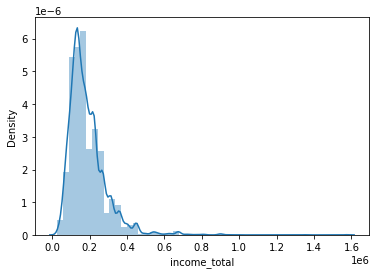

2.659270736824145
1.2972638753260712


In [13]:
sns.distplot(train.income_total)
plt.show()
print(train.income_total.skew())
print(np.log1p(train.income_total.skew()))

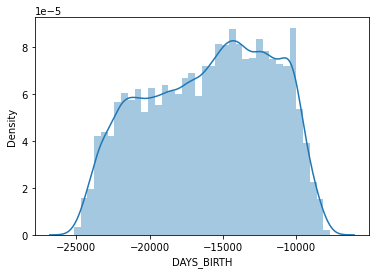

-0.18598627799050726
-0.20577805561616358


In [14]:
sns.distplot(train.DAYS_BIRTH)
plt.show()
print(train.DAYS_BIRTH.skew())
print(np.log1p(train.DAYS_BIRTH.skew()))

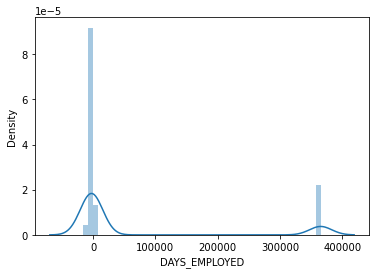

1.7775960013665866
1.0215858058826945


In [15]:
sns.distplot(train.DAYS_EMPLOYED)
plt.show()
print(train.DAYS_EMPLOYED.skew())
print(np.log1p(train.DAYS_EMPLOYED.skew()))

In [16]:
#train.income_total = np.log1p(train.income_total)

In [17]:
#train.DAYS_EMPLOYED = np.log1p(train.DAYS_EMPLOYED)

In [18]:
#test.income_total = np.log1p(test.income_total)

In [19]:
#test.DAYS_EMPLOYED = np.log1p(test.DAYS_EMPLOYED)

In [21]:
train2 = pd.get_dummies(columns = train.columns[train.dtypes == 'object'], data = train)

In [22]:
test2 = pd.get_dummies(columns = test.columns[test.dtypes == 'object'], data = test)

In [136]:
skf = StratifiedKFold(n_splits = 6, shuffle = True, random_state = 405)

In [157]:
cat_pred = np.zeros((test2.shape[0], 3))
i = 0
for tr_idx, val_idx in skf.split(train2, train2.credit) :
    i += 1
    print(f'=========================={i} FOLD=========================')
    tr_x, tr_y = train2.drop('credit', axis = 1).loc[tr_idx], train2.credit.loc[tr_idx]
    val_x, val_y = train2.drop('credit', axis = 1).loc[val_idx], train2.credit.loc[val_idx]
    
    cat = CatBoostClassifier(random_state = 406, silent = True, depth = 5)
    
    cat.fit(tr_x, tr_y)
    pred = cat.predict_proba(test2)
    cat_pred += pred

==========================1 FOLD=========================
==========================2 FOLD=========================
==========================3 FOLD=========================
==========================4 FOLD=========================
==========================5 FOLD=========================
==========================6 FOLD=========================


In [158]:
#ngb_pred = np.zeros((test2.shape[0], 3))
#i = 0
#for tr_idx, val_idx in skf.split(train2, train2.credit) :
#    i += 1
#    print(f'=========================={i} FOLD=========================')
#    tr_x, tr_y = train2.drop('credit', axis = 1).loc[tr_idx], train2.credit.loc[tr_idx]
#    val_x, val_y = train2.drop('credit', axis = 1).loc[val_idx], train2.credit.loc[val_idx]
#    
#    ngb = NGBClassifier(random_state = 406, verbose = 500)
###    ngb.fit(tr_x, tr_y)
#    pred = ngb.predict_proba(test2) / 6
#    ngb_pred += pred

In [159]:
gb_pred = np.zeros((test2.shape[0], 3))
i = 0
for tr_idx, val_idx in skf.split(train2, train2.credit) :
    i += 1
    print(f'=========================={i} FOLD=========================')
    tr_x, tr_y = train2.drop('credit', axis = 1).loc[tr_idx], train2.credit.loc[tr_idx]
    val_x, val_y = train2.drop('credit', axis = 1).loc[val_idx], train2.credit.loc[val_idx]
    
    gb = GradientBoostingClassifier(random_state = 406, max_depth = 5)
    gb.fit(tr_x, tr_y)
    pred = gb.predict_proba(test2)
    gb_pred += pred

==========================1 FOLD=========================
==========================2 FOLD=========================
==========================3 FOLD=========================
==========================4 FOLD=========================
==========================5 FOLD=========================
==========================6 FOLD=========================


In [160]:
lgb_pred = np.zeros((test2.shape[0], 3))
i = 0
for tr_idx, val_idx in skf.split(train2, train2.credit) :
    i += 1
    print(f'=========================={i} FOLD=========================')
    tr_x, tr_y = train2.drop('credit', axis = 1).loc[tr_idx], train2.credit.loc[tr_idx]
    val_x, val_y = train2.drop('credit', axis = 1).loc[val_idx], train2.credit.loc[val_idx]
    
    lgb = LGBMClassifier(n_estimators = 1000, random_state = 405, max_depth = 6)
    
    lgb.fit(tr_x, tr_y, eval_set = [(tr_x, tr_y), (val_x, val_y)],
            early_stopping_rounds = 150, verbose = 100)
    
    pred = lgb.predict_proba(test2)
    lgb_pred += pred

==========================1 FOLD=========================
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Training until validation scores don't improve for 150 rounds
[100]	training's multi_logloss: 0.682602	valid_1's multi_logloss: 0.77291
[200]	training's multi_logloss: 0.605143	valid_1's multi_logloss: 0.758461
[300]	training's multi_logloss: 0.547231	valid_1's multi_logloss: 0.751095
[400]	training's multi_logloss: 0.500744	valid_1's multi_logloss: 0.745994
[500]	training's multi_logloss: 0.464905	valid_1's multi_logloss: 0.744679
[600]	training's multi_logloss: 0.430492	valid_1's multi_logloss: 0.749808
Early stopping, best iteration is:
[486]	training's multi_logloss: 0.469532	valid_1's multi_logloss: 0.744126
==========================2 FOLD=========================
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Tra

In [161]:
xgb_pred = np.zeros((test2.shape[0], 3))
i = 0
for tr_idx, val_idx in skf.split(train2, train2.credit) :
    i += 1
    print(f'=========================={i} FOLD=========================')
    tr_x, tr_y = train2.drop('credit', axis = 1).loc[tr_idx], train2.credit.loc[tr_idx]
    val_x, val_y = train2.drop('credit', axis = 1).loc[val_idx], train2.credit.loc[val_idx]
    
    xgb = XGBClassifier(n_estimators = 750, random_state = 405, max_depth = 6)
    
    xgb.fit(tr_x, tr_y, eval_metric = 'mlogloss', eval_set = [(tr_x, tr_y), (val_x, val_y)],
            early_stopping_rounds = 150, verbose = 100)
    
    pred = xgb.predict_proba(test2)
    xgb_pred += pred

==========================1 FOLD=========================
[0]	validation_0-mlogloss:0.97340	validation_1-mlogloss:0.97952
[100]	validation_0-mlogloss:0.56166	validation_1-mlogloss:0.75036
[200]	validation_0-mlogloss:0.45062	validation_1-mlogloss:0.74373
[300]	validation_0-mlogloss:0.37292	validation_1-mlogloss:0.75148
[312]	validation_0-mlogloss:0.36612	validation_1-mlogloss:0.75298
==========================2 FOLD=========================
[0]	validation_0-mlogloss:0.97415	validation_1-mlogloss:0.97790
[100]	validation_0-mlogloss:0.55983	validation_1-mlogloss:0.74777
[200]	validation_0-mlogloss:0.44786	validation_1-mlogloss:0.73841
[300]	validation_0-mlogloss:0.36965	validation_1-mlogloss:0.74941
[338]	validation_0-mlogloss:0.34619	validation_1-mlogloss:0.75384
==========================3 FOLD=========================
[0]	validation_0-mlogloss:0.97533	validation_1-mlogloss:0.97740
[100]	validation_0-mlogloss:0.56571	validation_1-mlogloss:0.73165
[200]	validation_0-mlogloss:0.45117	vali

In [162]:
final_pred = (xgb_pred**(1/6) + lgb_pred**(1/6) + gb_pred**(1/6) + cat_pred**(1/6)) / 4

In [163]:
submission.iloc[:, 1:] = final_pred

In [164]:
submission.to_csv('0406_3rd_submission.csv', index = False)